# Map plot of SRTM DEM based [on](http://geologyandpython.com/dem-processing.html) 
1. [SRTM](https://earthdata.nasa.gov/nasa-shuttle-radar-topography-mission-srtm-version-3-0-global-1-arc-second-data-released-over-asia-and-australia)

In [1]:
#http://geologyandpython.com/dem-processing.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
bounds = gpd.read_file('../data/vector/Mumbai_extent.geojson').bounds

In [3]:
bounds

minx       miny       maxx       maxy
0  72.776333  18.893956  72.979731  19.270177

In [4]:
west, south, east, north = bounds = bounds.loc[0]

In [5]:
west, south, east, north = bounds  = west - .05, south - .05, east + .05, north + .05

# Download the DEM

In [6]:
import elevation
import os
dem_path = '/home/jovyan/FOSS-Python-GeospatialAnalysis/data/raster/Mumbai_DEM.tif'
output = dem_path

In [8]:
elevation.clip(bounds=bounds, output=output, product='SRTM3')

# Read the DEM

In [9]:
import rasterio

dem_raster = rasterio.open(output)
source = dem_raster.read(1)
source
#dem_raster

array([[-32768, -32768, -32768, ...,     17,     15,     13],
       [-32768, -32768, -32768, ...,     14,     12,     12],
       [-32768, -32768, -32768, ...,     14,     13,      9],
       ...,
       [-32768, -32768, -32768, ...,     63,     74,     90],
       [-32768, -32768, -32768, ...,     67,     69,     91],
       [-32768, -32768, -32768, ...,     62,     69,     93]], dtype=int16)

In [10]:
source.shape

(571, 364)

# Visualize the DEM

In [11]:
#try:
import pycpt
topocmap = pycpt.load.cmap_from_cptcity_url('wkp/schwarzwald/wiki-schwarzwald-cont.cpt')
#except:
#    topocmap = 'Spectral_r'
#

In [12]:
from numpy import copy, random, arange

# unique, counts = np.unique(source, return_counts=True)
# dattif=dict(zip(unique, counts))
# dattif

def f1(a, d):
    b = copy(a)
    for k, v in d.items():
        b[a==k] = v
    return b

d = {-32768:0,-16:0,-15:0,-13:0,-12:0,-11:0,-10:0,-9:0,-8:0,-7:0,-6:0,-5:0,-4:0,-3:0,-2:0,-1:0}
data_dem=f1(source,d)

In [14]:
unique, counts = np.unique(data_dem, return_counts=True)
dattif=dict(zip(unique, counts))
dattif

{0: 104556,
 1: 8812,
 2: 8121,
 3: 6912,
 4: 5649,
 5: 4784,
 6: 4356,
 7: 3850,
 8: 3528,
 9: 3272,
 10: 3035,
 11: 2795,
 12: 2488,
 13: 2345,
 14: 2141,
 15: 1927,
 16: 1735,
 17: 1523,
 18: 1358,
 19: 1202,
 20: 1152,
 21: 930,
 22: 933,
 23: 830,
 24: 753,
 25: 764,
 26: 630,
 27: 652,
 28: 553,
 29: 514,
 30: 520,
 31: 513,
 32: 610,
 33: 436,
 34: 409,
 35: 442,
 36: 355,
 37: 386,
 38: 370,
 39: 334,
 40: 335,
 41: 317,
 42: 334,
 43: 333,
 44: 307,
 45: 272,
 46: 248,
 47: 284,
 48: 254,
 49: 270,
 50: 246,
 51: 249,
 52: 731,
 53: 224,
 54: 250,
 55: 209,
 56: 222,
 57: 204,
 58: 207,
 59: 205,
 60: 178,
 61: 185,
 62: 167,
 63: 206,
 64: 173,
 65: 156,
 66: 170,
 67: 169,
 68: 174,
 69: 159,
 70: 147,
 71: 143,
 72: 158,
 73: 122,
 74: 128,
 75: 125,
 76: 131,
 77: 126,
 78: 106,
 79: 140,
 80: 117,
 81: 112,
 82: 121,
 83: 110,
 84: 109,
 85: 115,
 86: 104,
 87: 95,
 88: 106,
 89: 103,
 90: 89,
 91: 96,
 92: 88,
 93: 96,
 94: 94,
 95: 90,
 96: 101,
 97: 87,
 98: 89,
 99: 1

In [15]:
import matplotlib.pyplot as plt

vmin = 180
vmax = 575

ax = sns.distplot(data_dem.ravel(), axlabel='Elevation (m)')
ax = plt.gca()
_ = [patch.set_color(topocmap(plt.Normalize(vmin=vmin, vmax=vmax)(patch.xy[0]))) for patch in ax.patches]
_ = [patch.set_alpha(1) for patch in ax.patches]
ax.get_figure().savefig('1.png')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [16]:
extent = xmin, xmax, ymin, ymax = west,east, south, north 

In [17]:
extent

(72.72633295153348, 73.02973149704592, 18.84395643371942, 19.320176667777737)

In [18]:
def hillshade(array, azimuth, angle_altitude):

    # Source: http://geoexamples.blogspot.com.br/2014/03/shaded-relief-images-using-gdal-python.html

    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azimuthrad = azimuth*np.pi / 180.
    altituderad = angle_altitude*np.pi / 180.


    shaded = np.sin(altituderad) * np.sin(slope) \
     + np.cos(altituderad) * np.cos(slope) \
     * np.cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2


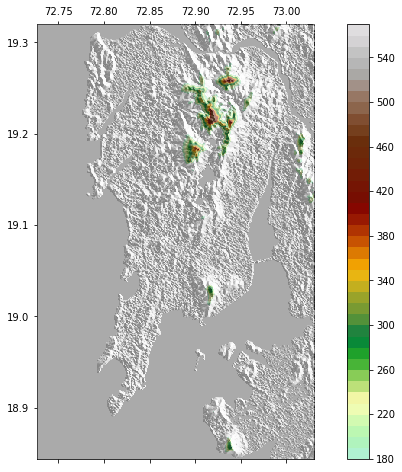

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.matshow(hillshade(data_dem, 30, 30), extent=extent, cmap='Greys', alpha=.5, zorder=10)
cax = ax.contourf(data_dem, np.arange(vmin, vmax, 10),extent=extent, 
                  cmap=topocmap, vmin=vmin, vmax=vmax, origin='image')
fig.colorbar(cax, ax=ax)
fig.savefig('2.png')

# Excercise
1. Make a plot of area of your interest